# 01_머신러닝 분석의 일반적인 단계 & Scikit-learn 활용

# scikit-learn의 기본 구조 이해


### 데이터 분석 단계에 따라 scikit-learn의 다양한 기능을 활용하여 머신러닝 모델을 학습하는 전과정 실습하는 단계

## 1. iris 데이터 불러오기

> 데이터 수집/저장의 단계로 수집된 iris 데이터를 불러온다

### scikit-learn 설치하기
> !pip install scikit-learn (%pip install scikit-learn)

In [1]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


### iris 데이터 셋을 사용하여 의사결정 트리 모델을 생성, 학습, 평가하고 모델의 정확도를 출력하는 예제

In [2]:
from sklearn.datasets import load_iris
# iris 데이터 불러오기
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

- data: 샘플의 특징 값들이 들어있는 배열. (꽃받침 길이, 꽃받침 너비, 꽃잎 길이, 꽃잎 너비)
- target: 각 샘플의 클래스 레이블 (품종). 0, 1, 2로 인코딩된 배열.
- target_names: 클래스 레이블의 실제 이름. (예: 'setosa', 'versicolor', 'virginica')
- DESCR: 데이터셋에 대한 설명.
- feature_names: 특징의 이름. (예: 'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)')
- filename: 데이터 파일의 위치.
- frame: (사용되지 않음, 최신 버전에서는 None)

### 1)데이터 shape 확인

In [3]:
iris.data.shape, iris.target.shape
# data : 150개의 데이터, 4개의 특징(컬럼)
# target : 150개의 타겟값이 존재한다. (4개의 특징중 하나에 속한다. )

((150, 4), (150,))

### 2)  클래스 레이블의 실제 이름과 특징 이름 확인

In [4]:
iris.target_names, iris.feature_names

(array(['setosa', 'versicolor', 'virginica'], dtype='<U10'),
 ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'])

### 3) 전체 정보 확인

In [5]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

## 2. 해당 모델을 학습시키고, 테스트하여 성능 평가

### 1. train_test_split 함수를 이용해서 데이터를 훈련세트와 테스트세트로 나눈다.

> 모델을 훈련 데이터로 학습시키고 테스트 데이터로 모델의 성능을 평가할 수 있다.

In [6]:
# 데이터를 학습용과 테스트용으로 분리 
from sklearn.model_selection import train_test_split

# 분류 => Classifier, 회귀 => Regressor
# 공통점 : 결정트리(DecionTree) 알고리즘을 사용
# 차이점  분류) 입력 : 입력 데이터가 주어진 클래스(카테고리) 중 하나에 속하도록 예측, 출력 : 이상적인 값 (스팸이냐, 아니야, 0-9 사ㅣ이에 있나)
#         회귀) 연속적인 실수값을 예측, 출력: 연속적인 값 (주택가격 예측, 온도 예측 )
from sklearn.tree import DecisionTreeClassifier

In [7]:
#random_state를 42 (랜덤 시드(seed)를 설정)로 고정하며 매번 동일한 결과가 나오도록 함
# X_train: 훈련 세트의 입력 데이터.
# X_test: 테스트 세트의 입력 데이터.
# y_train: 훈련 세트의 출력 데이터.
# y_test: 테스트 세트의 출력 데이터.

## 훈련 세트와 테스트 세트를 분할하여 모델을 학습시킨다.
x_train, x_test,y_train, y_test = train_test_split(iris.data, iris.target, random_state=42)

### 3) DecisionTreeClassifier 클래스를 사용하여 의사결정 트리 분류 모델 생성

> - criterion='entropy' 분할 기준을 무질서하게 사용. ( 정보 이득을 최대화하는 방향으로 분할 한다.)
> - criterion='gini' 분할 기준을 지니계수를 사용한다.

In [8]:
model = DecisionTreeClassifier(criterion='entropy')

### 4) 생성된 의사결정 트리 모델을 훈련 데이터를 사용하여 학습시킨다.
> fit 메서드는 모델을 데이터에 맞추어 학습시키는 역할을 한다.

In [9]:
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

###  5) 훈련된 모델을 테스트(평가)해서 정확도를 알아낸다.


> 테스트 세트를 사용하여 평가한다.

In [10]:
model.score(x_test, y_test)

0.9736842105263158

## 3. 데이터 분석 및 전처리

In [11]:
!pip install seaborn

In [12]:
!pip install --upgrade seaborn pandas

Note: you may need to restart the kernel to use updated packages.


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [15]:
# unique() 함수를 사용하여 배열의 고유값과 각 고유값의 빈도수를 반환하는 기능
np.unique(iris.target, return_counts=True)

## 고유한 값이 0, 1, 2 로 각각 50개씩 가지고 있다
# (array([0, 1, 2]), array([50, 50, 50], dtype=int64))

(array([0, 1, 2]), array([50, 50, 50], dtype=int64))

In [16]:
df.columns = ['si', 'sw', 'pl','pw']
df['species'] = iris.target_names[iris.target]

In [17]:
df

,si,sw,pl,pw,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### 1) 결측치 처리

> - 결측치 : 데이터셋에서 누락된 값
> - 결측치 처리 방법 : 1. 삭제, 2. 대체(평균,중앙값,최빈값으로 대체)
> - isna() 함수 사용 

In [18]:
df.isna().sum()

si         0
sw         0
pl         0
pw         0
species    0
dtype: int64

### 2) 기본 전체 정보 확인하기

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   si       150 non-null    float64
 1   sw       150 non-null    float64
 2   pl       150 non-null    float64
 3   pw       150 non-null    float64
 4   species  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### 3) 기술 통계 확인하기

In [20]:
df.describe()

,si,sw,pl,pw
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [21]:
df.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

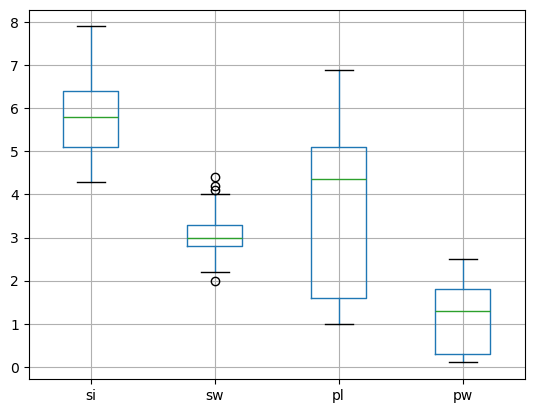

In [22]:
df.boxplot()
plt.show()

###  4) 시각화

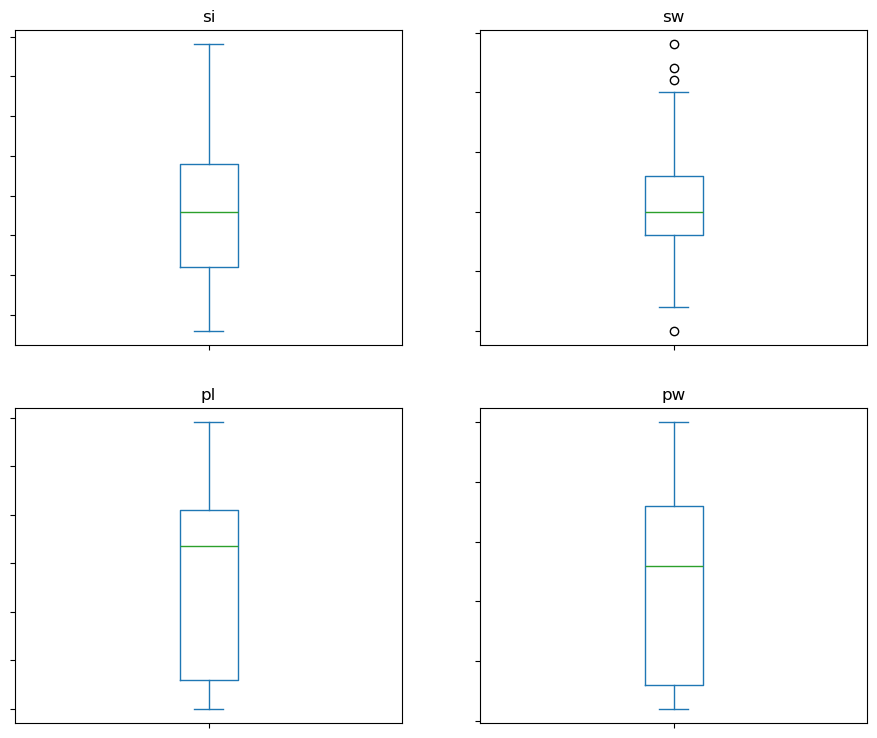

In [23]:
def boxplot_iris(feature_names, dataset):
    i = 1
    plt.figure(figsize=(11,9))
    for col in feature_names:
        plt.subplot(2, 2, i)
        i += 1    
        # : axis='both': x축과 y축 둘 다에 대해 설정을 적용합니다.
        # left=True, top=False, right=False, bottom=True: 왼쪽과 아래쪽 틱만 표시하고, 오른쪽과 위쪽 틱은 표시하지 않습니다.
        # labelleft=False, labeltop=False, labelright=False, labelbottom=False: 모든 축 레이블을 표시하지 않습니다.
        plt.tick_params(axis='both', left=True, top=False, right=False, bottom=True, 
                        labelleft=False,labeltop=False, labelright=False, labelbottom=False)
        # 시각화 종류 : 상자 그림
        dataset[col].plot(kind='box', subplots=True, sharex=False, sharey=False)
        plt.title(col)
    plt.show()    
boxplot_iris(df.columns[:-1],df)

### 2) 히스토그램

> - 히스토그램은 어떠한 변수에 대해서 구간별 빈도수를 나타내는 그래프 
> - 직관적으로 분포의 경향을 파악할 수 있다.

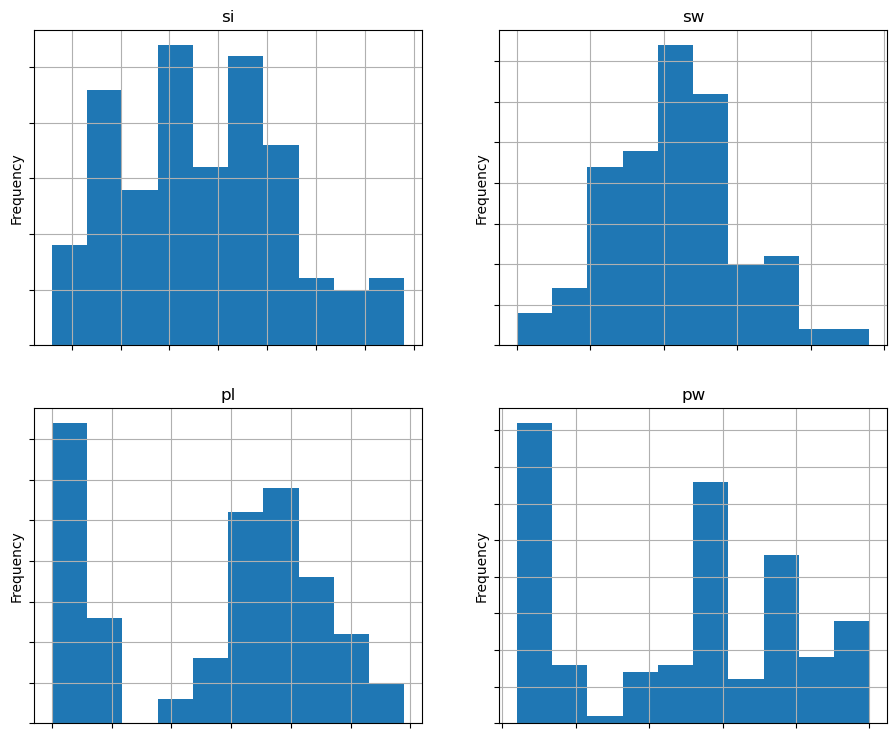

In [24]:
def histogram_iris(feature_names, dataset):
    i = 1
    plt.figure(figsize=(11,9))
    for col in feature_names:
        plt.subplot(2, 2, i)
        i += 1    
        # : axis='both': x축과 y축 둘 다에 대해 설정을 적용합니다.
        # left=True, top=False, right=False, bottom=True: 왼쪽과 아래쪽 틱만 표시하고, 오른쪽과 위쪽 틱은 표시하지 않습니다.
        # labelleft=False, labeltop=False, labelright=False, labelbottom=False: 모든 축 레이블을 표시하지 않습니다.
        plt.tick_params(axis='both', left=True, top=False, right=False, bottom=True, 
                        labelleft=False,labeltop=False, labelright=False, labelbottom=False)
        # 시각화 종류 : 히스토그램
        dataset[col].plot(kind='hist', subplots=True, sharex=False, sharey=False)
        plt.title(col)
        plt.grid()
    plt.show()    
histogram_iris(df.columns[:-1],df)

### 3) 산점도
> - 두 변수간의 관계를 시각화 한것
> - 데이터의 분포와 경향을 ㅍ파악하는데 유용하다

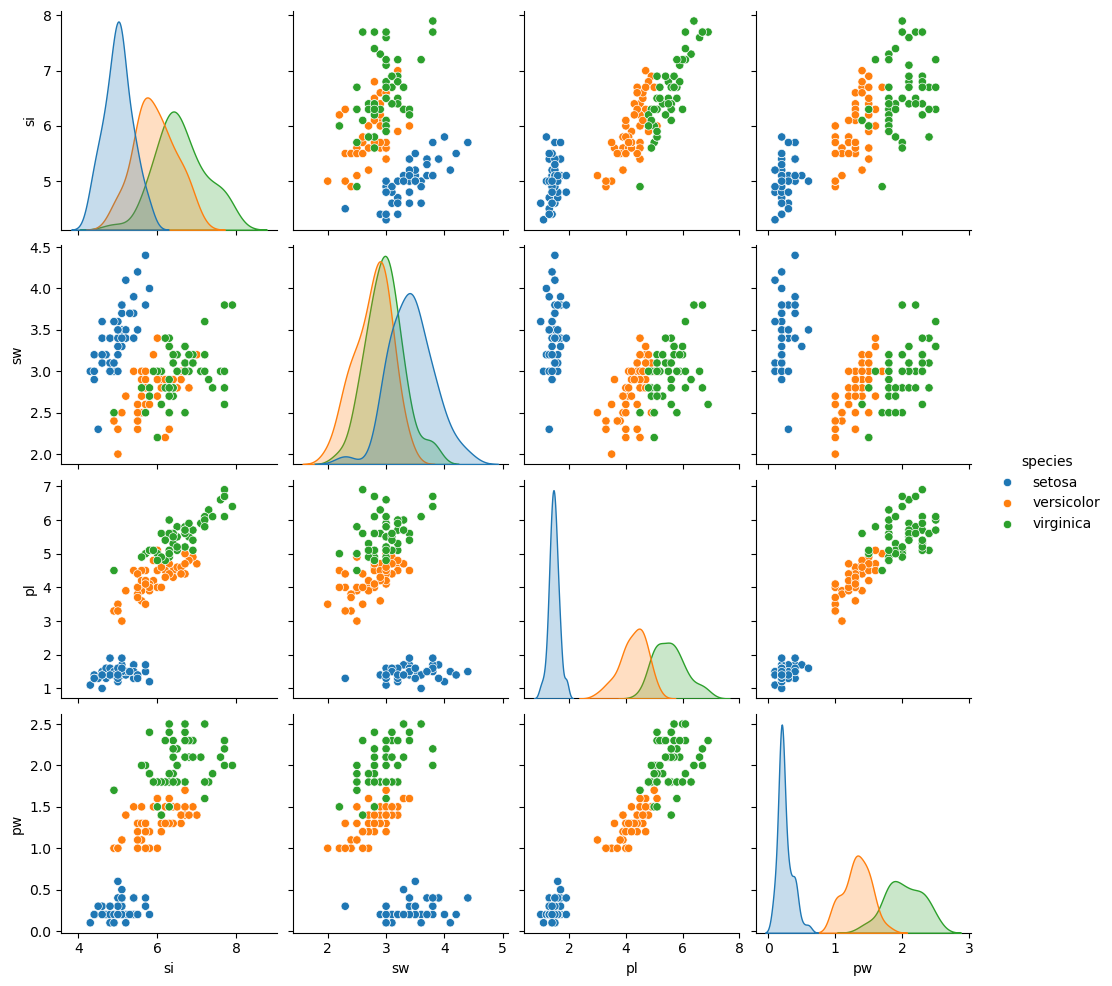

In [25]:
pd.option_context('mode.use_inf_as_na', True)
sns.pairplot(df, hue="species")
plt.show()

## 5. 스케일링

> - 데이터 전처리 과정에서 매우 중요한 단계 중 하나
> - 변수들의 값을 일정한 범위로 변환하는 작업을 의미한다.
> - 모델의 성능을 향상 시키고 학습 속도를 높일 수 있다.

### 종류 : 표준화, 정규화, RobustScaler, MaxAbsScaler

> - 표준화 : SttandardScaler() => 각 특징의 평균을 0, 표준편차를 1로 변환
> - 정규화 : MinMaxScaler() => 데이터를 [0,1] 범위로 변환
> - RobustScaler : RobustScaler() => 중앙값과 IOR사용,  **이상치의 영향을 최소화** 할 수 있다.
> - MaxAbsScaler : 각 특징의 최대 절대값이 1이 되도록 스케일링 한다.

In [36]:
## 훈련 세트와 테스트 세트를 분할하여 모델을 학습시킨다.
## 전체 데이터의 25%를 테스트 데이터로 할당
X_train, X_test,Y_train, Y_test = train_test_split(iris.data, iris.target, test_size=0.25 , random_state=42)

In [41]:
### RobustScaler를 이용해서 데이터의 스케일을 동등하게 맞추자
from sklearn.preprocessing import RobustScaler
sclaer = RobustScaler().fit(X_train)

# 스케일링 한 것을 이용하여 기존의 데이터 변경
X_train_scaled = sclaer.transform(X_train)
X_test_scaled = sclaer.transform(X_test)

## 확인하기
## 학습데이터의 평균과 스케일링된 데이터의 평균을 비교
## 스케일링 된 데이터의 평균이 좀 더 일정한 수준으로 변경된 것을 알 수 있다.
X_train.mean(0), X_train_scaled.mean(0)

(array([5.83035714, 3.04017857, 3.80714286, 1.21428571]),
 array([ 0.02335165,  0.08035714, -0.14081633, -0.05714286]))

## 6. LogisticRegression(로지스틱 회귀)은 이진 분류 문제를 해결하기 위해 사용되는 선형모델

> - 입력 변수의 선형 조합을 사용하여 특정 클래스에 속할 확률을 예측
> - 스팸/정상, 질병진단(양성/음성)
> - LogisticRegression() 함수 사용

In [42]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
# 학습
model.fit(X_train_scaled, Y_train)
# 시험(결과: 정확도)
model.score(X_test_scaled, Y_test)

1.0

## 7. 모델을 일반화 하기 위해서 교차검증(cross-validation)

> - fold : 데이터 셋을 나눈 하나의 부분
> - KFold : 주어진 데이터 셋을 k개 폴드로 나누고, 각 폴드를 테스트 셋으로 사용하면서 나머자 k-1개의 폴드를 학습 셋으로 사용 <br>
    `kFfold()`, 구간을 나눌 때 동일한 크기로 나눈다.
> - StratifiedKFold : KFold를 변형한 것, 각 폴드가 전체 데이터 셋 클래스 비율을 유지하도록 하는 방법 <br>
    `StratifiedKFold()`, 원본 데이터셋의 클래스 비율을 유지하면서 나눈다.

### 1) KFold

In [61]:
from sklearn.model_selection import cross_val_score, KFold

# n_splits = 5 => 폴드를 5개로, shuffle=> 데이터를 나누기 전에 무작위로 섞을지 여부
cv = KFold(n_splits=5, shuffle=True, random_state=42)

res = cross_val_score(model,X_train_scaled, Y_train, cv=cv)

result = res.mean()

result

for k, v in enumerate(res):
    print("{0}번째 교차 검증 정확도 : {1}".format(k,v))
    
print("최종 정확도 : " ,result)

0번째 교차 검증 정확도 : 0.8695652173913043
1번째 교차 검증 정확도 : 1.0
2번째 교차 검증 정확도 : 0.9090909090909091
3번째 교차 검증 정확도 : 0.9090909090909091
4번째 교차 검증 정확도 : 0.9090909090909091
최종 정확도 :  0.9193675889328062


### 2) StratifiedKFold

In [62]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

res = cross_val_score(model,X_train_scaled, Y_train, cv=cv)

result = res.mean()

result


for k, v in enumerate(res):
    print("{0}번째 교차 검증 정확도 : {1}".format(k,v))
    
print("최종 정확도 : " ,result)

0번째 교차 검증 정확도 : 0.9565217391304348
1번째 교차 검증 정확도 : 0.9130434782608695
2번째 교차 검증 정확도 : 0.8636363636363636
3번째 교차 검증 정확도 : 0.9090909090909091
4번째 교차 검증 정확도 : 0.9545454545454546
최종 정확도 :  0.9193675889328062
